In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# loading dataset into Pandas DataFrame

df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

targets = ['Low', 'Low-Mid', 'Top-Mid', 'Top']
h_cols = ['Country', 'GDP', 'Family', 'Life', 'Freedom', 'Generosity', 'Trust']
def prep_frame(df_year, year):
    df = pd.DataFrame()
    # Work around to load 2015, 2016, 2017, 2018, 2019 data into one common column
    target_cols = []
    for c in h_cols:
        target_cols.extend([x for x in df_year.columns if c in x])
    df[h_cols] = df_year[target_cols]
    df['Happiness Score'] = df_year[[x for x in df_year.columns if 'Score' in x]]
    # Calculate quartiles on the data.
    df["target"] = pd.qcut(df[df.columns[-1]], len(targets), labels=targets)
    df["target_n"] = pd.qcut(df[df.columns[-2]], len(targets), labels=range(len(targets)))
    # Append year and assign to multi-index
    df['Year'] = year
    df = df.set_index(['Country', 'Year'])
    return df
df = prep_frame(df_2015, 2015)
df = df.append(prep_frame(df_2016, 2016), sort=False)
df = df.append(prep_frame(df_2017, 2017), sort=False)


df.head()



GDP   Family     Life  Freedom  Generosity    Trust  \
Country     Year                                                            
Switzerland 2015  1.39651  1.34951  0.94143  0.66557     0.29678  0.41978   
Iceland     2015  1.30232  1.40223  0.94784  0.62877     0.43630  0.14145   
Denmark     2015  1.32548  1.36058  0.87464  0.64938     0.34139  0.48357   
Norway      2015  1.45900  1.33095  0.88521  0.66973     0.34699  0.36503   
Canada      2015  1.32629  1.32261  0.90563  0.63297     0.45811  0.32957   

                  Happiness Score target target_n  
Country     Year                                   
Switzerland 2015            7.587    Top        3  
Iceland     2015            7.561    Top        3  
Denmark     2015            7.527    Top        3  
Norway      2015            7.522    Top        3  
Canada      2015            7.427    Top        3

In [8]:
spearman_cormatrix= df.corr(method='spearman')
spearman_cormatrix

GDP    Family      Life   Freedom  Generosity     Trust  \
GDP              1.000000  0.584480  0.803493  0.374744    0.006568  0.214877   
Family           0.584480  1.000000  0.490872  0.454714    0.080144  0.098352   
Life             0.803493  0.490872  1.000000  0.382680    0.086622  0.175155   
Freedom          0.374744  0.454714  0.382680  1.000000    0.383047  0.458121   
Generosity       0.006568  0.080144  0.086622  0.383047    1.000000  0.231411   
Trust            0.214877  0.098352  0.175155  0.458121    0.231411  1.000000   
Happiness Score  0.800252  0.627502  0.760712  0.554569    0.153457  0.305066   

                 Happiness Score  
GDP                     0.800252  
Family                  0.627502  
Life                    0.760712  
Freedom                 0.554569  
Generosity              0.153457  
Trust                   0.305066  
Happiness Score         1.000000

In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


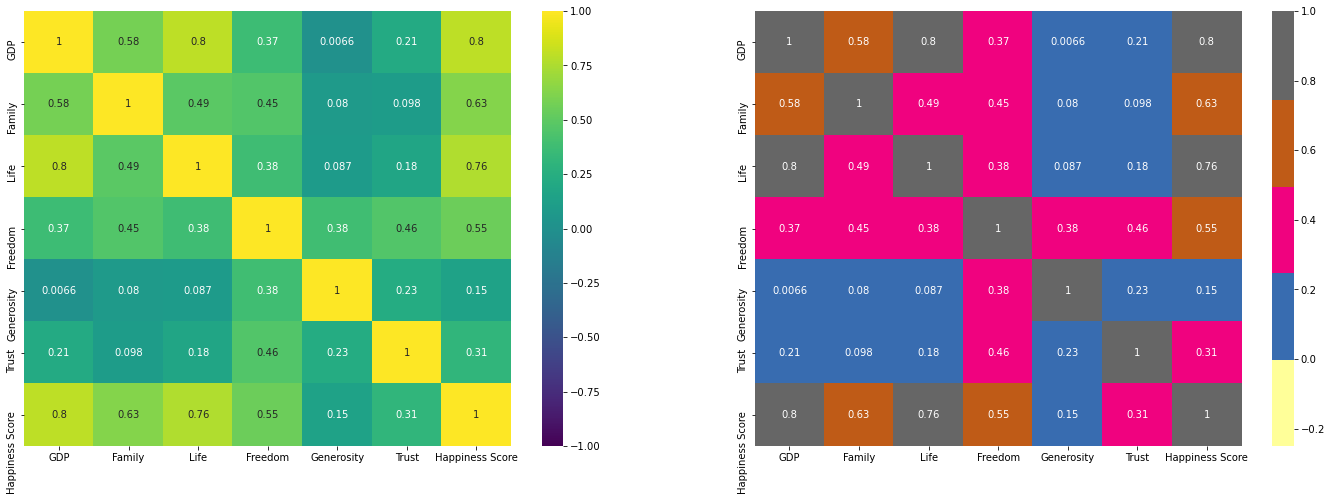

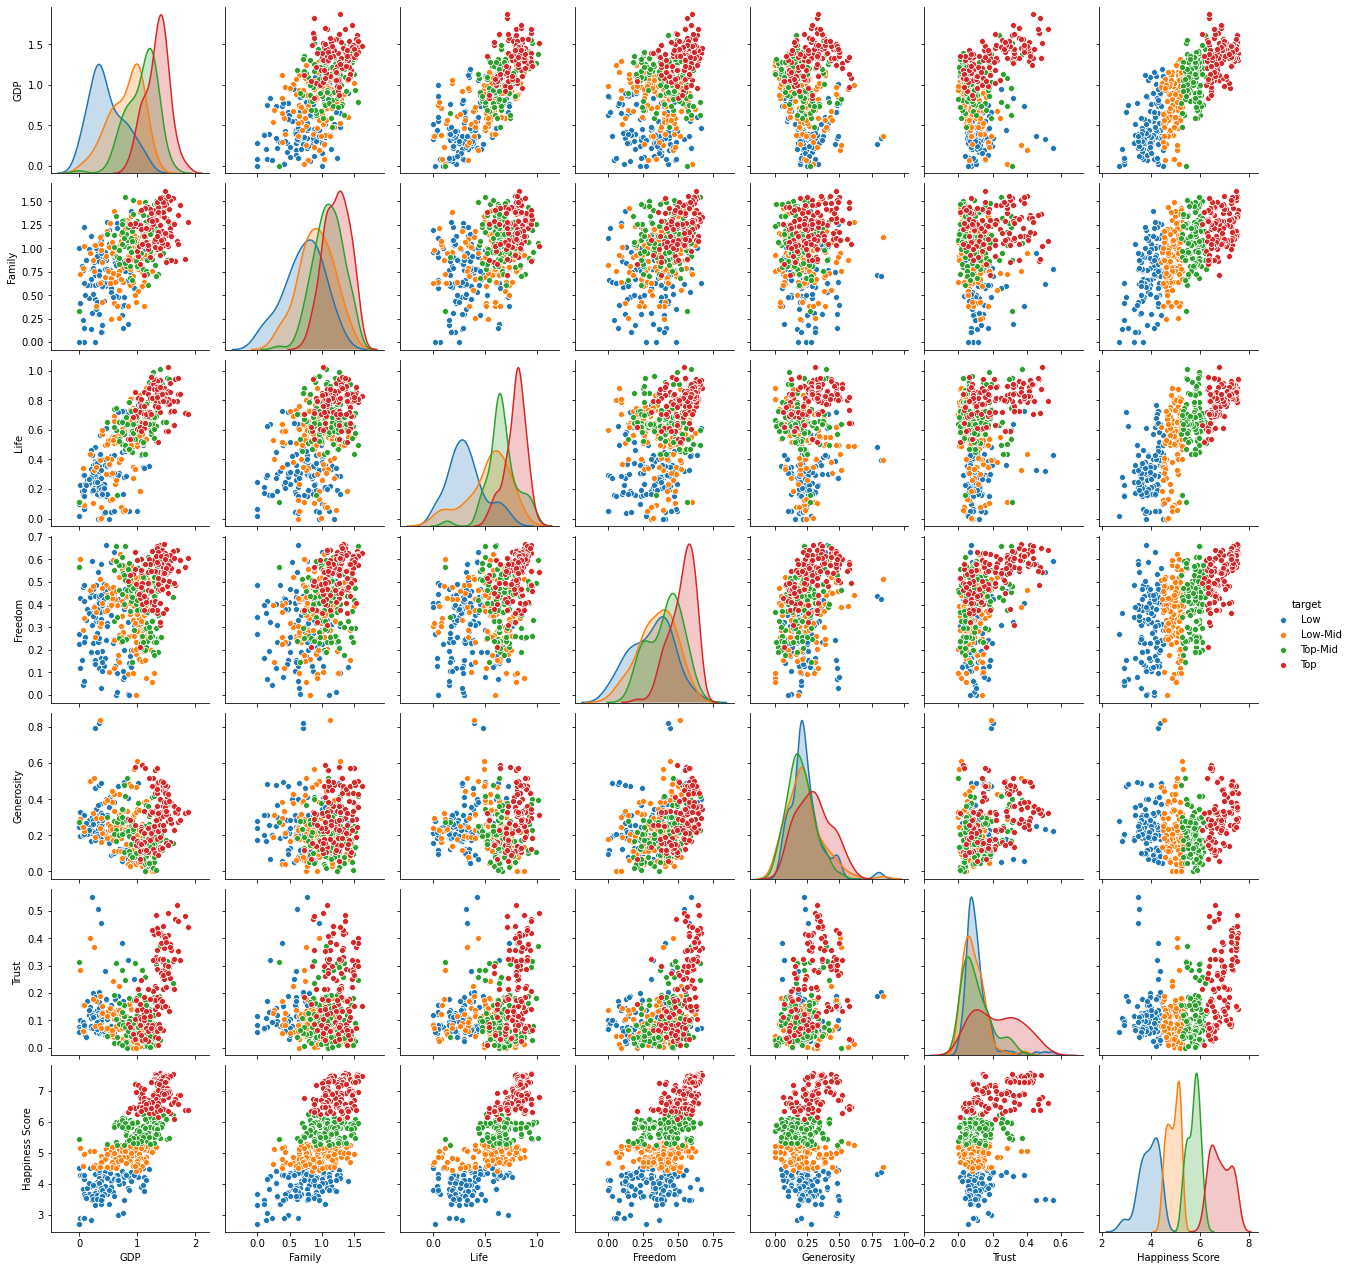

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

targets = ['Low', 'Low-Mid', 'Top-Mid', 'Top']
h_cols = ['Country', 'GDP', 'Family', 'Life', 'Freedom', 'Generosity', 'Trust']
def prep_frame(df_year, year):
    df = pd.DataFrame()
    # Work around to load 2015, 2016, 2017, 2018, 2019 data into one common column
    target_cols = []
    for c in h_cols:
        target_cols.extend([x for x in df_year.columns if c in x])
    df[h_cols] = df_year[target_cols]
    df['Happiness Score'] = df_year[[x for x in df_year.columns if 'Score' in x]]
    # Calculate quartiles on the data.
    df["target"] = pd.qcut(df[df.columns[-1]], len(targets), labels=targets)
    df["target_n"] = pd.qcut(df[df.columns[-2]], len(targets), labels=range(len(targets)))
    # Append year and assign to multi-index
    df['Year'] = year
    df = df.set_index(['Country', 'Year'])
    return df
df = prep_frame(df_2015, 2015)
df = df.append(prep_frame(df_2016, 2016), sort=False)
df = df.append(prep_frame(df_2017, 2017), sort=False)


df.head()



spearman_cormatrix= df.corr(method='spearman')
spearman_cormatrix
fig, ax = plt.subplots(ncols=2,figsize=(24, 8))
sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, ax=ax[0], center=0, cmap="viridis", annot=True)
sns.heatmap(spearman_cormatrix, vmin=-.25, vmax=1, ax=ax[1], center=0, cmap="Accent", annot=True)

sns.pairplot(df.drop(['target_n'], axis=1), hue='target')


In [16]:
pip install altair_viewer

  Created wheel for portpicker: filename=portpicker-1.3.1-py3-none-any.whl size=13669 sha256=8631adad01627318952eb9c7e282e866395dbd17668a55d9bd9e6318ab343e00
  Stored in directory: c:\users\benda's\appdata\local\pip\cache\wheels\79\41\b5\c922618972ef3ad0bfa030d39016537cd9f915918bd72b8bbe
Successfully built portpicker



Displaying chart at http://localhost:15957/

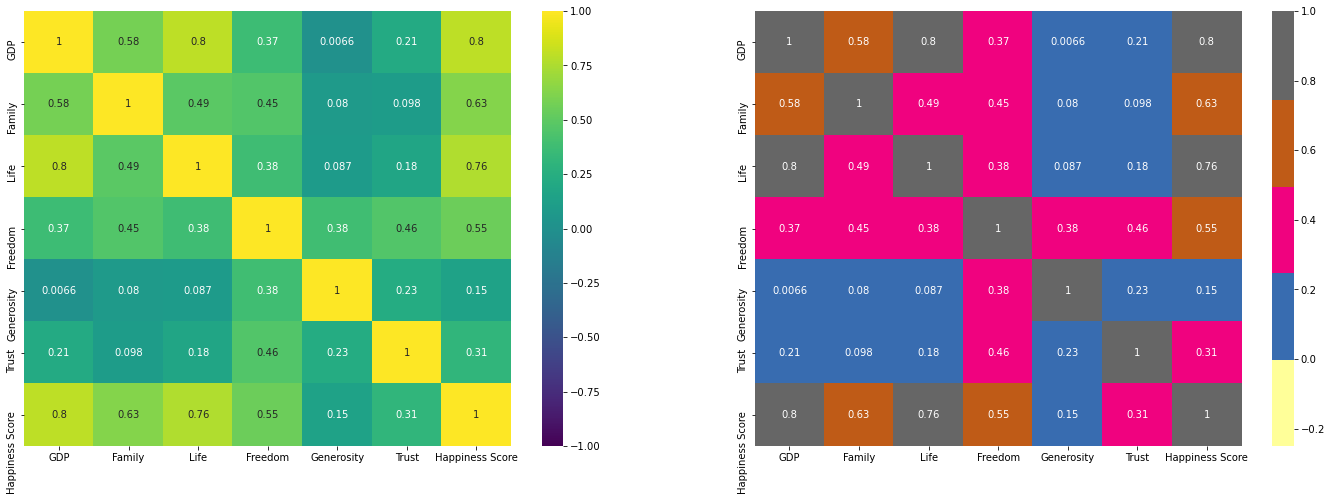

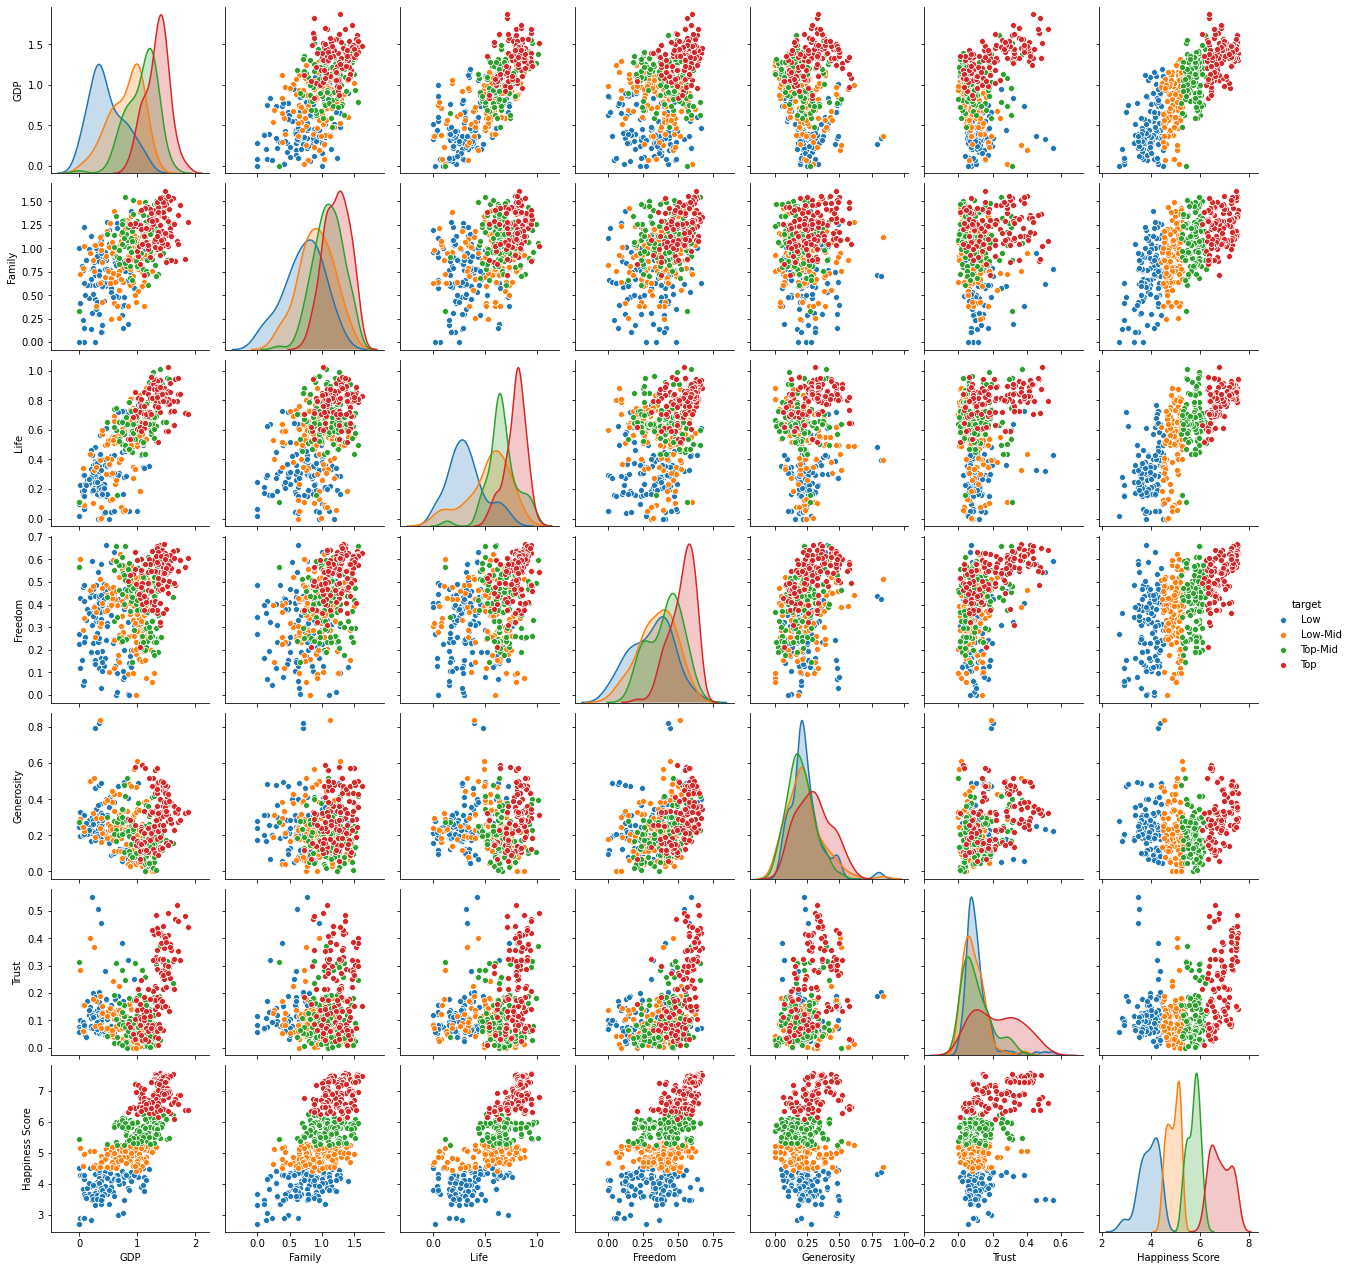

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import MiniBatchSparsePCA as PCA
import altair as alt
alt.__version__ 
alt.renderers.enable('altair_viewer')
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

targets = ['Low', 'Low-Mid', 'Top-Mid', 'Top']
h_cols = ['Country', 'GDP', 'Family', 'Life', 'Freedom', 'Generosity', 'Trust']
def prep_frame(df_year, year):
    df = pd.DataFrame()
    # Work around to load 2015, 2016, 2017, 2018, 2019 data into one common column
    target_cols = []
    for c in h_cols:
        target_cols.extend([x for x in df_year.columns if c in x])
    df[h_cols] = df_year[target_cols]
    df['Happiness Score'] = df_year[[x for x in df_year.columns if 'Score' in x]]
    # Calculate quartiles on the data.
    df["target"] = pd.qcut(df[df.columns[-1]], len(targets), labels=targets)
    df["target_n"] = pd.qcut(df[df.columns[-2]], len(targets), labels=range(len(targets)))
    # Append year and assign to multi-index
    df['Year'] = year
    df = df.set_index(['Country', 'Year'])
    return df
df = prep_frame(df_2015, 2015)
df = df.append(prep_frame(df_2016, 2016), sort=False)
df = df.append(prep_frame(df_2017, 2017), sort=False)


df.head()



spearman_cormatrix= df.corr(method='spearman')
spearman_cormatrix
fig, ax = plt.subplots(ncols=2,figsize=(24, 8))
sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, ax=ax[0], center=0, cmap="viridis", annot=True)
sns.heatmap(spearman_cormatrix, vmin=-.25, vmax=1, ax=ax[1], center=0, cmap="Accent", annot=True)

sns.pairplot(df.drop(['target_n'], axis=1), hue='target')

#from sklearn.decomposition import PCA

pca = PCA(n_components=2,
          batch_size=10,
          
          random_state=42)
principalComponents = pca.fit_transform(df[h_cols[1:-2]])

source = df.copy()
source['component 1'] = principalComponents[:,0]
source['component 2'] = principalComponents[:,1]
source.head()

base = alt.Chart(source.reset_index())

xscale = alt.Scale(domain=(source['component 1'].min(), source['component 1'].max()))
yscale = alt.Scale(domain=(source['component 2'].min(), source['component 2'].max()))

area_args = {'opacity': .6, 'interpolate': 'step'}

points = base.mark_circle(size=60).encode(
    alt.X('component 1', scale=xscale),
    alt.Y('component 2', scale=yscale),
    color='target',
    tooltip=['Country', 'target', 'GDP', 'Family', 'Life']
).properties(height=600,width=600).interactive()


top_hist = base.mark_area(**area_args).encode(
    alt.X('component 1:Q',
          # when using bins, the axis scale is set through
          # the bin extent, so we do not specify the scale here
          # (which would be ignored anyway)
          bin=alt.Bin(maxbins=20, extent=xscale.domain),
          stack=None,
          title=''
         ),
    alt.Y('count()', stack=None, title=''),
    alt.Color('target:N'),
).properties(height=60,width=600)

right_hist = base.mark_area(**area_args).encode(
    alt.Y('component 2:Q',
          bin=alt.Bin(maxbins=20, extent=yscale.domain),
          stack=None,
          title='',
         ),
    alt.X('count()', stack=None, title=''),
    alt.Color('target:N'),
).properties(width=60,height=600)

top_hist & (points | right_hist)

:Overlay
   .Curve.Low.I                        :Curve   [variable]   (value)
   .Curve.Low.II                       :Curve   [variable]   (value)
   .Curve.Low.III                      :Curve   [variable]   (value)
   .Curve.Low.IV                       :Curve   [variable]   (value)
   .Curve.Low.V                        :Curve   [variable]   (value)
   .Curve.Low.VI                       :Curve   [variable]   (value)
   .Curve.Low.VII                      :Curve   [variable]   (value)
   .Curve.Low.VIII                     :Curve   [variable]   (value)
   .Curve.Low.IX                       :Curve   [variable]   (value)
   .Curve.Low.X                        :Curve   [variable]   (value)
   .Curve.Low.XI                       :Curve   [variable]   (value)
   .Curve.Low.XII                      :Curve   [variable]   (value)
   .Curve.Low.XIII                     :Curve   [variable]   (value)
   .Curve.Low.XIV                      :Curve   [variable]   (value)
   .Curve.Low.XV                       :Curve   [variable]   (value)
   .Curve.Low.XVI                      :Curve   [variable]   (value)
   .Curve.Low.XVII                     :Curve   [variable]   (value)
   .Curve.Low.XVIII                    :Curve   [variable]   (value)
   .Curve.Low.XIX                      :Curve   [variable]   (value)
   .Curve.Low.XX                       :Curve   [variable]   (value)
   .Curve.Low.XXI                      :Curve   [variable]   (value)
   .Curve.Low.XXII                     :Curve   [variable]   (value)
   .Curve.Low.XXIII                    :Curve   [variable]   (value)
   .Curve.Low.XXIV                     :Curve   [variable]   (value)
   .Curve.Low.XXV                      :Curve   [variable]   (value)
   .Curve.Low.XXVI                     :Curve   [variable]   (value)
   .Curve.Low.XXVII                    :Curve   [variable]   (value)
   .Curve.Low.XXVIII                   :Curve   [variable]   (value)
   .Curve.Low.XXIX                     :Curve   [variable]   (value)
   .Curve.Low.XXX                      :Curve   [variable]   (value)
   .Curve.Low.XXXI                     :Curve   [variable]   (value)
   .Curve.Low.XXXII                    :Curve   [variable]   (value)
   .Curve.Low.XXXIII                   :Curve   [variable]   (value)
   .Curve.Low.XXXIV                    :Curve   [variable]   (value)
   .Curve.Low.XXXV                     :Curve   [variable]   (value)
   .Curve.Low.XXXVI                    :Curve   [variable]   (value)
   .Curve.Low.XXXVII                   :Curve   [variable]   (value)
   .Curve.Low.XXXVIII                  :Curve   [variable]   (value)
   .Curve.Low.XXXIX                    :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.I       :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.II      :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.III     :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.IV      :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.V       :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.VI      :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.VII     :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.VIII    :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.IX      :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.X       :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.XI      :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.XII     :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.XIII    :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.XIV     :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.XV      :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.XVI     :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.XVII    :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.XVIII   :Curve   [variable]   (value)
   .Curve.Low_hyphen_minus_Mid.XIX     :Curve   [variable]

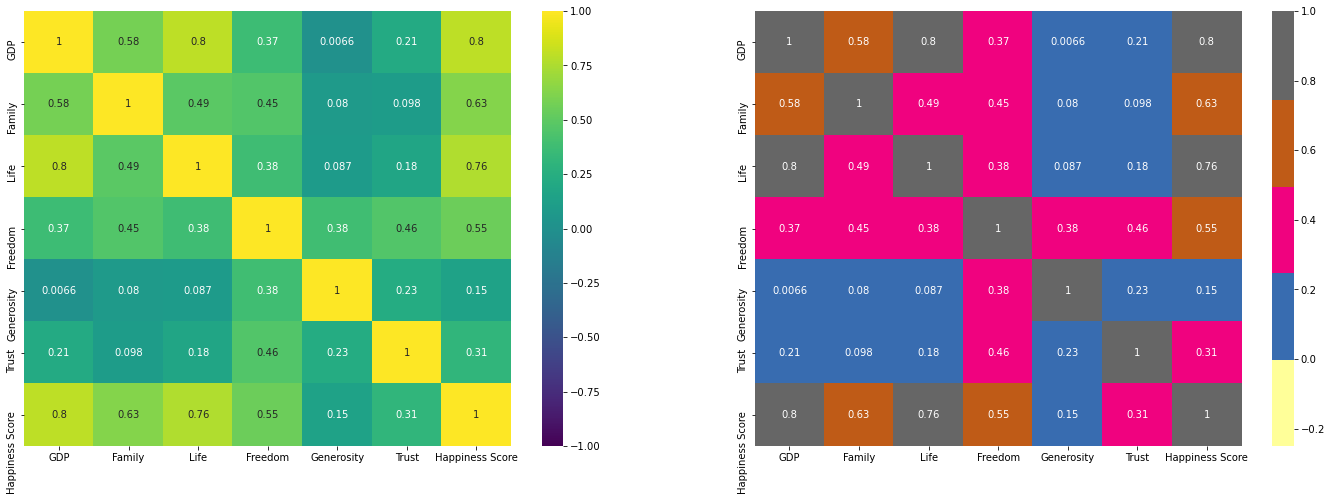

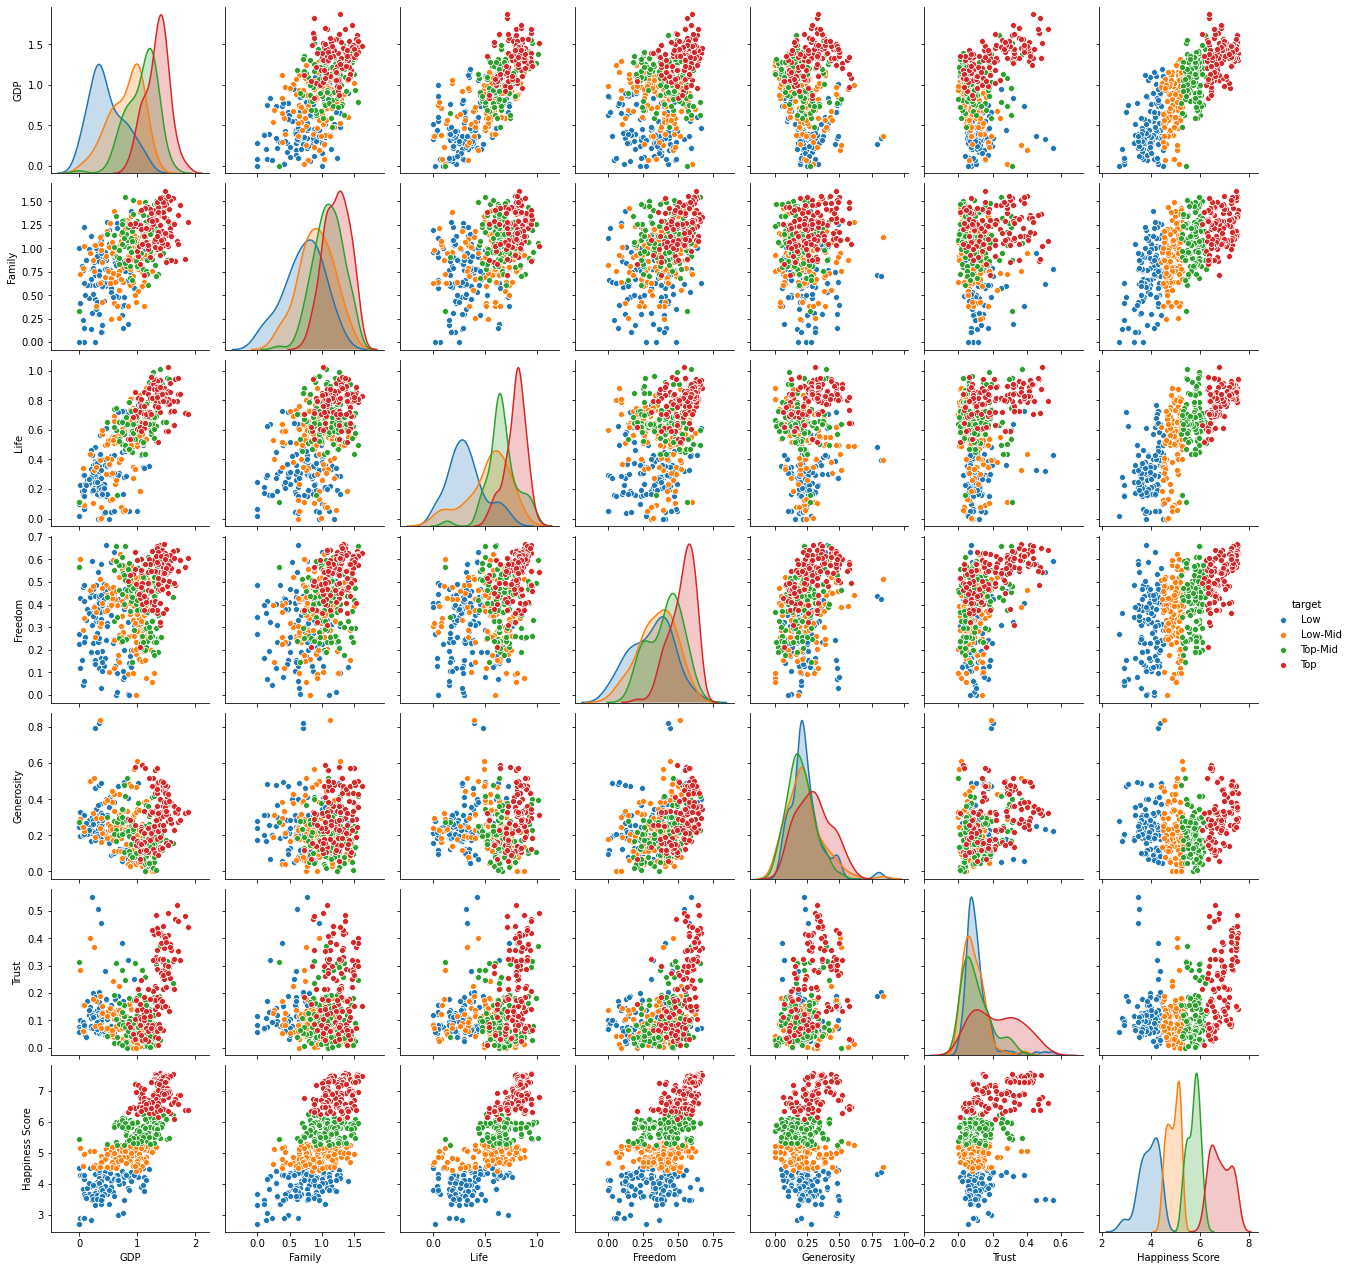

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import MiniBatchSparsePCA as PCA
import altair as alt
from sklearn import preprocessing
import hvplot.pandas

from hvplot import parallel_coordinates



alt.__version__ 
alt.renderers.enable('altair_viewer')


df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

targets = ['Low', 'Low-Mid', 'Top-Mid', 'Top']
h_cols = ['Country', 'GDP', 'Family', 'Life', 'Freedom', 'Generosity', 'Trust']
def prep_frame(df_year, year):
    df = pd.DataFrame()
    # Work around to load 2015, 2016, 2017, 2018, 2019 data into one common column
    target_cols = []
    for c in h_cols:
        target_cols.extend([x for x in df_year.columns if c in x])
    df[h_cols] = df_year[target_cols]
    df['Happiness Score'] = df_year[[x for x in df_year.columns if 'Score' in x]]
    # Calculate quartiles on the data.
    df["target"] = pd.qcut(df[df.columns[-1]], len(targets), labels=targets)
    df["target_n"] = pd.qcut(df[df.columns[-2]], len(targets), labels=range(len(targets)))
    # Append year and assign to multi-index
    df['Year'] = year
    df = df.set_index(['Country', 'Year'])
    return df
df = prep_frame(df_2015, 2015)
df = df.append(prep_frame(df_2016, 2016), sort=False)
df = df.append(prep_frame(df_2017, 2017), sort=False)


df.head()



spearman_cormatrix= df.corr(method='spearman')
spearman_cormatrix
fig, ax = plt.subplots(ncols=2,figsize=(24, 8))
sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, ax=ax[0], center=0, cmap="viridis", annot=True)
sns.heatmap(spearman_cormatrix, vmin=-.25, vmax=1, ax=ax[1], center=0, cmap="Accent", annot=True)

sns.pairplot(df.drop(['target_n'], axis=1), hue='target')

#from sklearn.decomposition import PCA

pca = PCA(n_components=2,
          batch_size=10,
          
          random_state=42)
principalComponents = pca.fit_transform(df[h_cols[1:-2]])

source = df.copy()
source['component 1'] = principalComponents[:,0]
source['component 2'] = principalComponents[:,1]
source.head()

base = alt.Chart(source.reset_index())

xscale = alt.Scale(domain=(source['component 1'].min(), source['component 1'].max()))
yscale = alt.Scale(domain=(source['component 2'].min(), source['component 2'].max()))

area_args = {'opacity': .6, 'interpolate': 'step'}

points = base.mark_circle(size=60).encode(
    alt.X('component 1', scale=xscale),
    alt.Y('component 2', scale=yscale),
    color='target',
    tooltip=['Country', 'target', 'GDP', 'Family', 'Life']
).properties(height=600,width=600).interactive()


top_hist = base.mark_area(**area_args).encode(
    alt.X('component 1:Q',
          # when using bins, the axis scale is set through
          # the bin extent, so we do not specify the scale here
          # (which would be ignored anyway)
          bin=alt.Bin(maxbins=20, extent=xscale.domain),
          stack=None,
          title=''
         ),
    alt.Y('count()', stack=None, title=''),
    alt.Color('target:N'),
).properties(height=60,width=600)

right_hist = base.mark_area(**area_args).encode(
    alt.Y('component 2:Q',
          bin=alt.Bin(maxbins=20, extent=yscale.domain),
          stack=None,
          title='',
         ),
    alt.X('count()', stack=None, title=''),
    alt.Color('target:N'),
).properties(width=60,height=600)

top_hist & (points | right_hist)

min_max_scaler = preprocessing.MinMaxScaler()
tmp_df = df.iloc[df.index.get_level_values('Year') == 2017].reset_index()
tmp_df.loc[:,["Happiness Score"]+h_cols[1:]] = min_max_scaler.fit_transform(tmp_df[["Happiness Score"]+h_cols[1:]])
hvplot.parallel_coordinates(tmp_df, 'target', cols=["Happiness Score"]+h_cols[1:], alpha=.3, tools=['hover', 'tap'], 
                          width=800, height=500)

In [8]:
pip install hvplot

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install holoviews

  Created wheel for bokeh: filename=bokeh-2.2.3-py3-none-any.whl size=9296319 sha256=9a303a2abfc0f3526da06cdf7a1c31759a31b2f377eefa948d8bbc31c1282b52
  Stored in directory: c:\users\benda's\appdata\local\pip\cache\wheels\44\48\ac\5cde9e6d0b1e0afb4cff564eaf59462468abe37cfc83cbb5ed
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.1.1
    Uninstalling bokeh-2.1.1:
      Successfully uninstalled bokeh-2.1.1
Note: you may need to restart the kernel to use updated packages.


AttributeError: 'str' object has no attribute 'name'

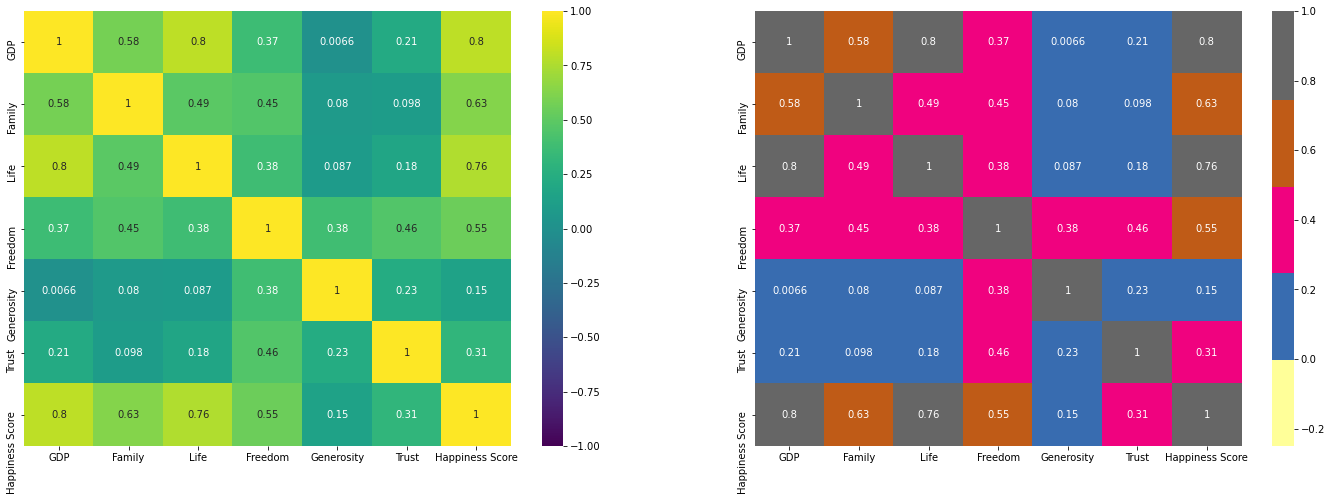

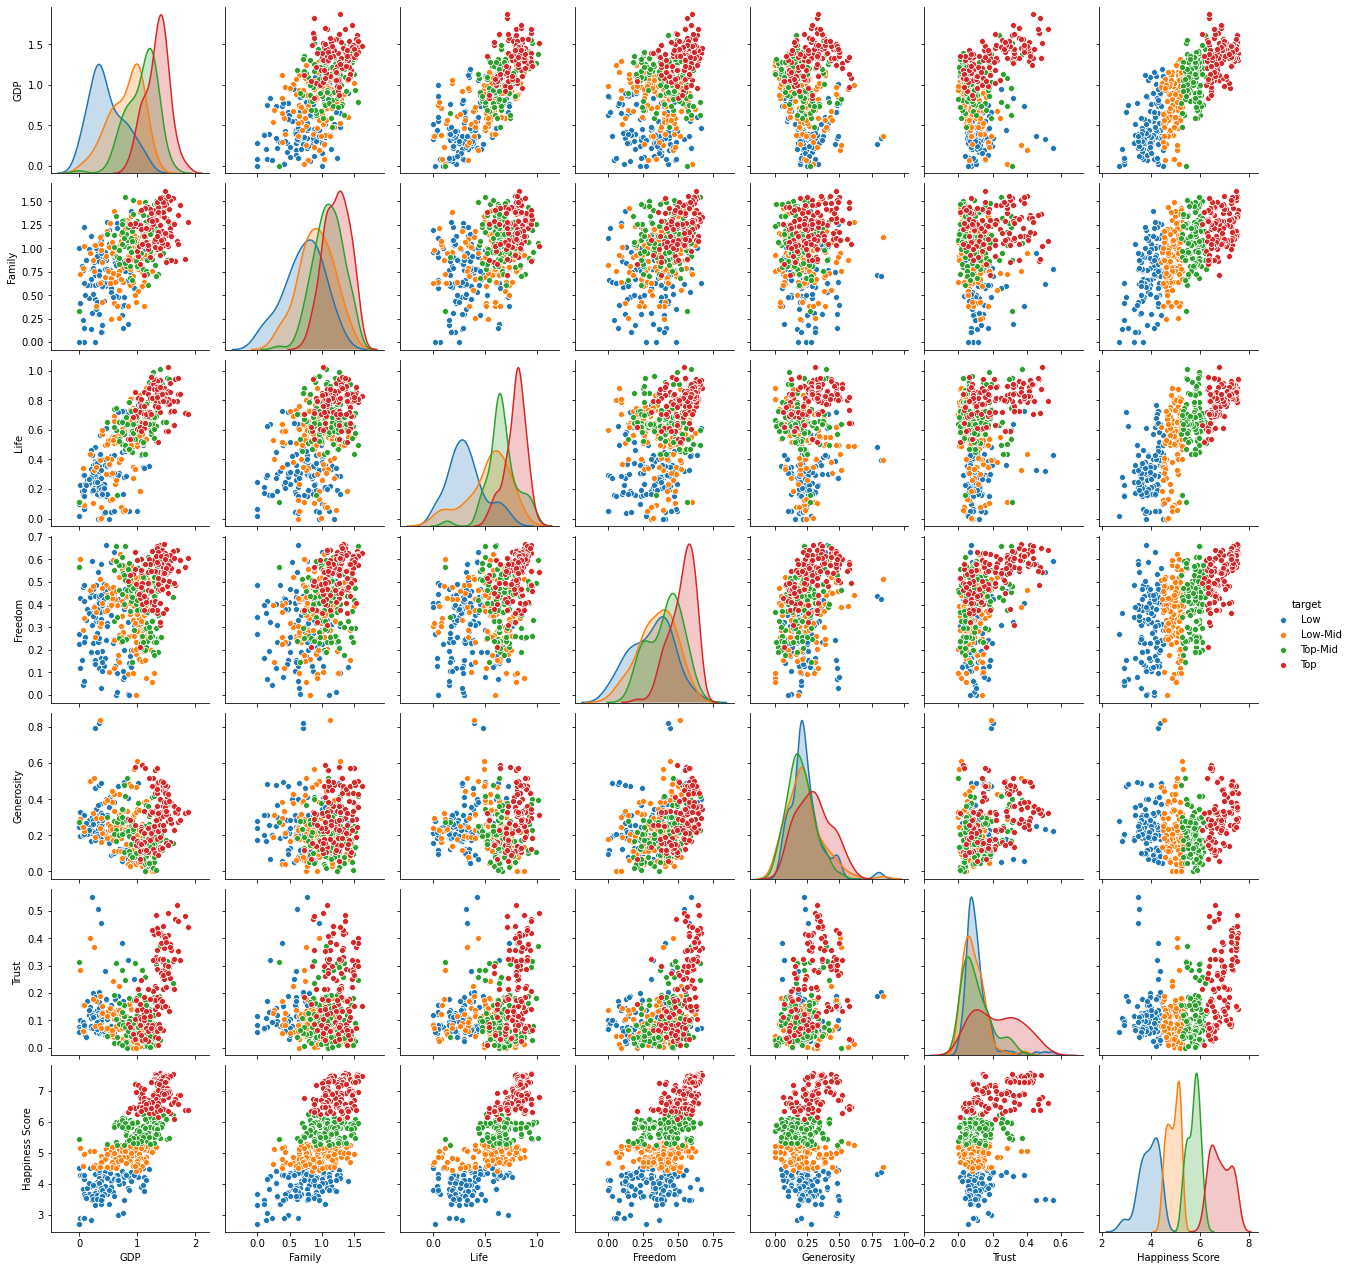

In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import MiniBatchSparsePCA as PCA
import altair as alt
from sklearn import preprocessing
import hvplot.pandas

from hvplot import parallel_coordinates



alt.__version__ 
alt.renderers.enable('altair_viewer')


df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

targets = ['Low', 'Low-Mid', 'Top-Mid', 'Top']
h_cols = ['Country', 'GDP', 'Family', 'Life', 'Freedom', 'Generosity', 'Trust']
def prep_frame(df_year, year):
    df = pd.DataFrame()
    # Work around to load 2015, 2016, 2017, 2018, 2019 data into one common column
    target_cols = []
    for c in h_cols:
        target_cols.extend([x for x in df_year.columns if c in x])
    df[h_cols] = df_year[target_cols]
    df['Happiness Score'] = df_year[[x for x in df_year.columns if 'Score' in x]]
    # Calculate quartiles on the data.
    df["target"] = pd.qcut(df[df.columns[-1]], len(targets), labels=targets)
    df["target_n"] = pd.qcut(df[df.columns[-2]], len(targets), labels=range(len(targets)))
    # Append year and assign to multi-index
    df['Year'] = year
    df = df.set_index(['Country', 'Year'])
    return df
df = prep_frame(df_2015, 2015)
df = df.append(prep_frame(df_2016, 2016), sort=False)
df = df.append(prep_frame(df_2017, 2017), sort=False)


df.head()



spearman_cormatrix= df.corr(method='spearman')
spearman_cormatrix
fig, ax = plt.subplots(ncols=2,figsize=(24, 8))
sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, ax=ax[0], center=0, cmap="viridis", annot=True)
sns.heatmap(spearman_cormatrix, vmin=-.25, vmax=1, ax=ax[1], center=0, cmap="Accent", annot=True)

sns.pairplot(df.drop(['target_n'], axis=1), hue='target')

#from sklearn.decomposition import PCA

pca = PCA(n_components=2,
          batch_size=10,
          
          random_state=42)
principalComponents = pca.fit_transform(df[h_cols[1:-2]])

source = df.copy()
source['component 1'] = principalComponents[:,0]
source['component 2'] = principalComponents[:,1]
source.head()

base = alt.Chart(source.reset_index())

xscale = alt.Scale(domain=(source['component 1'].min(), source['component 1'].max()))
yscale = alt.Scale(domain=(source['component 2'].min(), source['component 2'].max()))

area_args = {'opacity': .6, 'interpolate': 'step'}

points = base.mark_circle(size=60).encode(
    alt.X('component 1', scale=xscale),
    alt.Y('component 2', scale=yscale),
    color='target',
    tooltip=['Country', 'target', 'GDP', 'Family', 'Life']
).properties(height=600,width=600).interactive()


top_hist = base.mark_area(**area_args).encode(
    alt.X('component 1:Q',
          # when using bins, the axis scale is set through
          # the bin extent, so we do not specify the scale here
          # (which would be ignored anyway)
          bin=alt.Bin(maxbins=20, extent=xscale.domain),
          stack=None,
          title=''
         ),
    alt.Y('count()', stack=None, title=''),
    alt.Color('target:N'),
).properties(height=60,width=600)

right_hist = base.mark_area(**area_args).encode(
    alt.Y('component 2:Q',
          bin=alt.Bin(maxbins=20, extent=yscale.domain),
          stack=None,
          title='',
         ),
    alt.X('count()', stack=None, title=''),
    alt.Color('target:N'),
).properties(width=60,height=600)

top_hist & (points | right_hist)

min_max_scaler = preprocessing.MinMaxScaler()
tmp_df = df.iloc[df.index.get_level_values('Year') == 2017].reset_index()
tmp_df.loc[:,["Happiness Score"]+h_cols[1:]] = min_max_scaler.fit_transform(tmp_df[["Happiness Score"]+h_cols[1:]])
hvplot.parallel_coordinates(tmp_df, 'target', cols=["Happiness Score"]+h_cols[1:], alpha=.3, tools=['hover', 'tap'], 
                          width=800, height=500)

rank_df = tmp_df[h_cols[:4]].rank(axis=0,numeric_only=True, method='dense', ascending=False)
rank_df['Country'] = tmp_df['Country']
rank_df['Influence'] = tmp_df[h_cols].rank(axis=0,numeric_only=True, method='dense').idxmax(axis=1)
rank_df['True Influence'] = tmp_df[h_cols[:4]].rank(axis=0,numeric_only=True, method='dense').idxmax(axis=1)
countries = {}
for country in tmp_df['Country']:
    countries[country.alpha_3] = country.name
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map['Country'] = [countries.get(country, 'Unknown Code') for country in list(world_map['iso_a3'])]

for q in world_map['Country']:
    if "Unknown Code" in q:
        world_map.loc[world_map.Country == q, 'Country'] = world_map.loc[world_map.Country == q, 'name']
    elif q in "Ivory Coast":
        world_map.loc[world_map.Country == q, 'Country'] = "Côte d'Ivoire"
    elif q in "Viet Nam":
        world_map.loc[world_map.Country == q, 'Country'] = "Vietnam"
    elif "Korea" in q:
        world_map.loc[world_map.Country == q, 'Country'] = "South Korea"
        

for x in rank_df['Country']:
    if not x in list(world_map['Country']):
        for q in world_map['Country']:
            if (x[:5] in q) and (not x[:5] in "South"):
                world_map.loc[world_map.Country == q, 'Country'] = x
                break
            elif fuzz.partial_ratio(x,q) > 75:
                world_map.loc[world_map.Country == q, 'Country'] = x
                break
        else:
            if not x in list(world_map['name']):
                world_map.loc[world_map.Country == q, 'Country'] = x
            

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(world_map[['iso_a3', 'name', 'Country']])